In [3]:
import numpy as np
import cmb_cpu

sky_temp = np.loadtxt("./input/cmb64_temp.txt")
sky_temp *= 10**6
sky_pos = np.loadtxt("./input/cmb64_pos.txt")

cmb = cmb_cpu.CMB_Map(sky_temp, sky_pos)
lat, lon = -20, 221
cmb.set_pole(lat, lon)

In [4]:
cap_angles = np.arange(10, 170, 1)
n_samples = 64 * 3

X2 = np.zeros(len(cap_angles))

top, bottom = cmb.get_top_bottom_caps(10)

for i, ca in enumerate(cap_angles):
    top, bottom = cmb.get_top_bottom_caps(ca)
    t_c = top.std_t()
    b_c = bottom.std_t()
    X2[i] = (t_c - b_c)**2

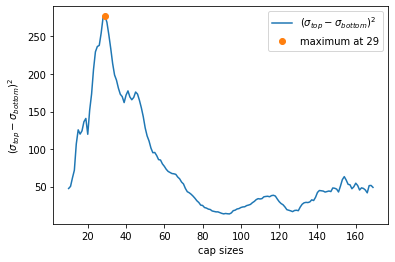

In [5]:
import matplotlib.pyplot as plt

plt.plot(cap_angles, X2)
label = r"$(\sigma_{top} - \sigma_{bottom})^2$"
plt.ylabel(label)
plt.xlabel(r"cap sizes")
_max = X2.argmax()
plt.plot(cap_angles[_max], X2[_max], "o")
plt.legend([label, "maximum at {}".format(cap_angles[_max])])